In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os


In [2]:
# matplotlib.rcParams.update({'font.size': 25})

In [3]:

file_name = r"/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/log_nes_run_1715100958.035098.log"

losses = {
    "mean" : [],
    "mmd" : [],
    "avg" : [],
    "min" : [],
    "max" : [],
    "avg_accepted": [],
    "max_accepted": [],
    "min_accepted": [],
}

with open(file_name, "r") as f:
    for line in f:
        words = line.split(" ")
        if words[0] == "Mean":
            losses["mean"].append(float(words[-1]))
        if words[0] == "MMD":
            losses["mmd"].append(float(words[-1]))
        if words[0] == "Avg":
            losses["avg"].append(float(words[-1]))
        if words[0] == "Min":
            losses["min"].append(float(words[-1]))
        if words[0] == "Max":
            losses["max"].append(float(words[-1]))
        if words[0] == "Avg_accepted":
            losses["avg_accepted"].append(float(words[-1]))
        if words[0] == "Min_accepted":
            losses["min_accepted"].append(float(words[-1]))
        if words[0] == "Max_accepted":
            losses["max_accepted"].append(float(words[-1]))

df = pd.DataFrame(data=losses)
df.to_csv(f"../data/losses.csv", index=False)

In [4]:
loss_df = pd.read_csv(r"../data/losses.csv")
loss_df["diff"] = loss_df["max"] - loss_df["min"]

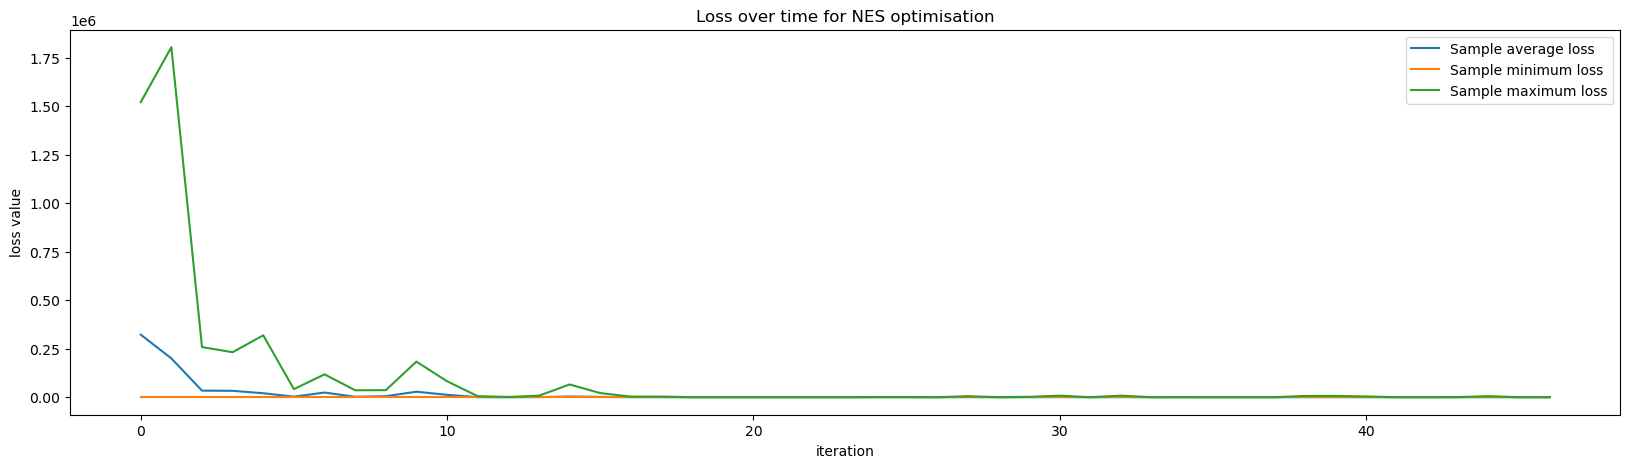

In [5]:
plt.figure(figsize=(20,5))
# plt.plot(loss_df["mean"], label="xNES mean loss")
plt.plot(loss_df["avg"], label="Sample average loss")
plt.plot(loss_df["min"], label="Sample minimum loss")
plt.plot(loss_df["max"], label="Sample maximum loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

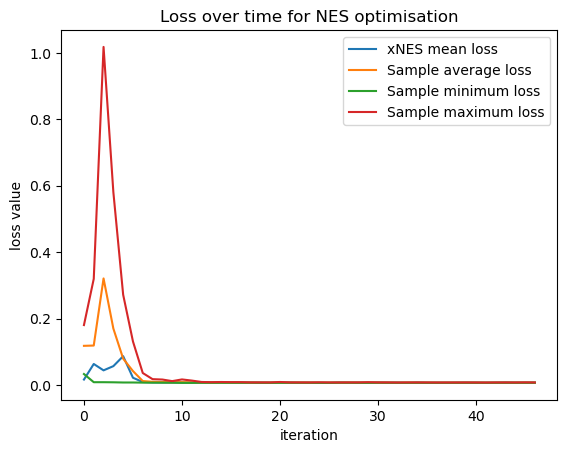

In [6]:
# plt.figure(figsize=(10,5))
plt.plot(loss_df["mean"], label="xNES mean loss")
plt.plot(loss_df["avg_accepted"], label="Sample average loss")
plt.plot(loss_df["min_accepted"], label="Sample minimum loss")
plt.plot(loss_df["max_accepted"], label="Sample maximum loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

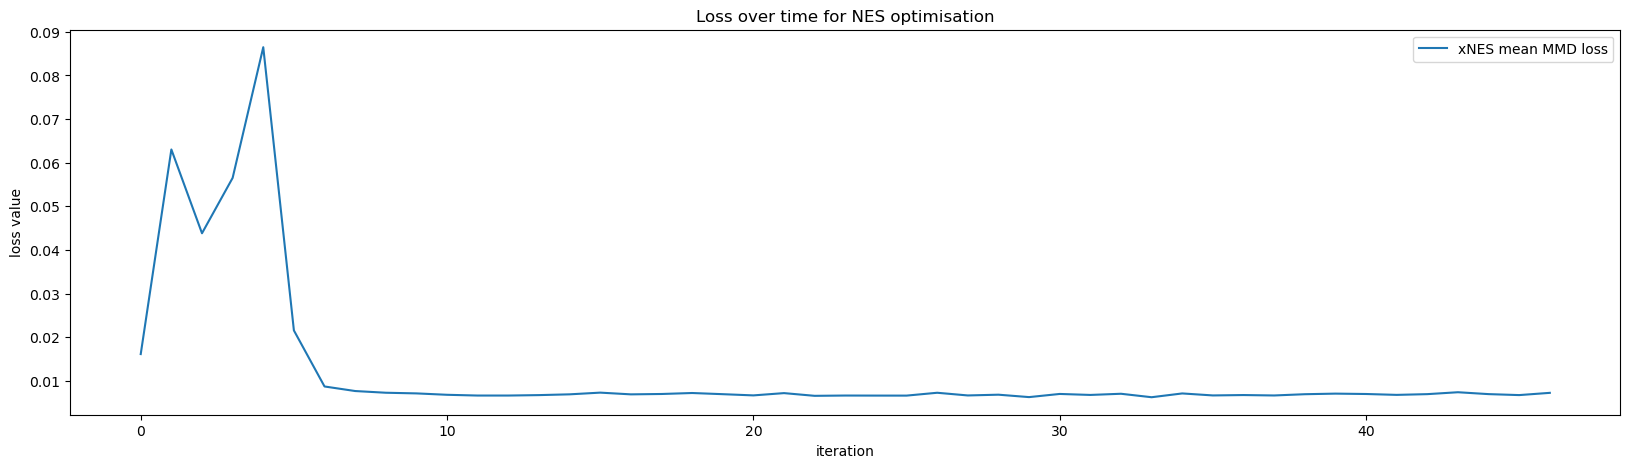

In [7]:
plt.figure(figsize=(20,5))
plt.plot(loss_df["mmd"], label="xNES mean MMD loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

In [30]:
def plot_standing_average(array, show=True, label=""):
    standing_average = []
    current = 0
    for i, loss in enumerate(array):
        current += loss
        standing_average.append(current / (i + 1))
    print(standing_average[-2] - standing_average[-1])
    plt.plot(standing_average, label=label)

    if show:
        plt.show()

2.5528315533404015e-05
4.41583496729684e-05
3.6746921939076124e-06
0.0001002664897634762


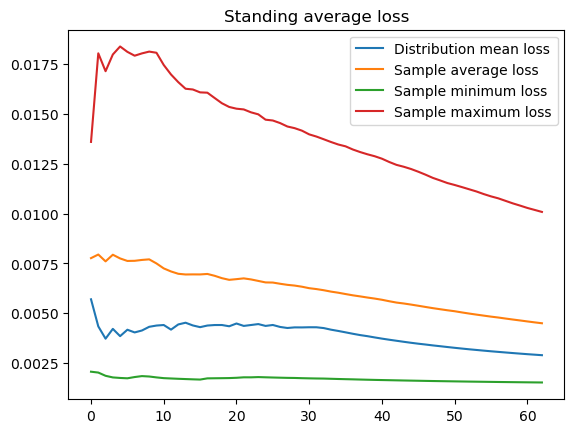

In [31]:
plot_standing_average(loss_df["mean"].to_numpy().squeeze(), show=False, label="Distribution mean loss")
plot_standing_average(loss_df["avg_accepted"].to_numpy().squeeze(), show=False, label="Sample average loss")
plot_standing_average(loss_df["min_accepted"].to_numpy().squeeze(), show=False, label="Sample minimum loss")
plot_standing_average(loss_df["max_accepted"].to_numpy().squeeze(), show=False, label="Sample maximum loss")
plt.title("Standing average loss")
plt.legend()
plt.show()

# plot_standing_average(loss_df["mmd"].to_numpy().squeeze())

In [32]:
def print_loss_analysis(array: np.ndarray):
    print("mean:", array.mean())
    print("std:", array.std())
    print("max:", array.max())
    print("min:", array.min())
    print("range:", array.max() - array.min())

    plt.hist(array)
    plt.show()

mean: 0.002902003792336251
std: 0.0018273050013773464
max: 0.0075677288696169
min: 0.0012972218682989
range: 0.006270507001318


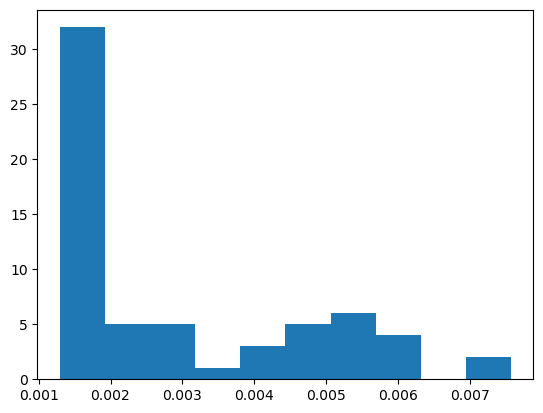

mean: 0.00450218687691381
std: 0.002049696831215684
max: 0.0089337397366762
min: 0.0016595164779573
range: 0.0072742232587189


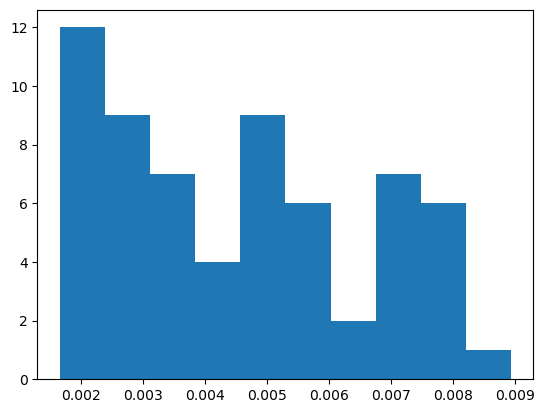

mean: 0.0015345669429127858
std: 0.0003014714764162378
max: 0.002703804988414
min: 0.0012901639565825
range: 0.0014136410318315


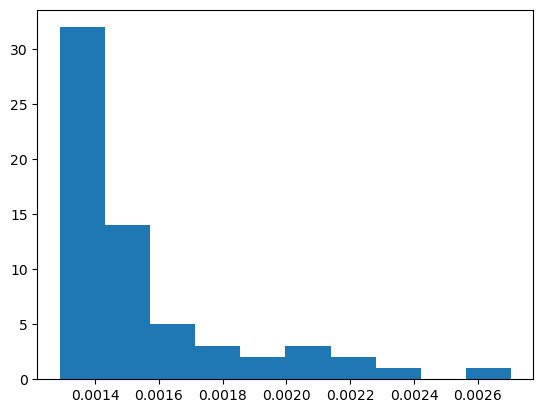

mean: 0.010080599285189078
std: 0.004810941074147906
max: 0.0224678553640842
min: 0.0031882794573903
range: 0.019279575906693897


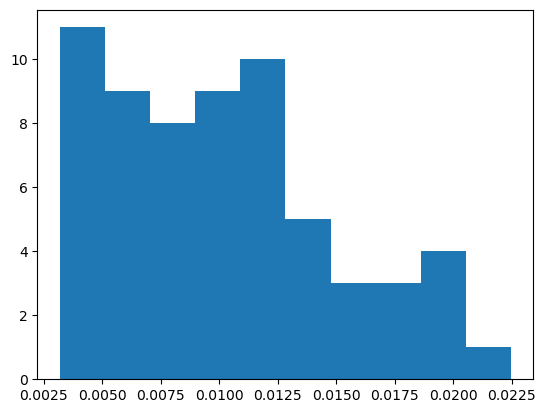

mean: 0.002902003792336251
std: 0.0018273050013773464
max: 0.0075677288696169
min: 0.0012972218682989
range: 0.006270507001318


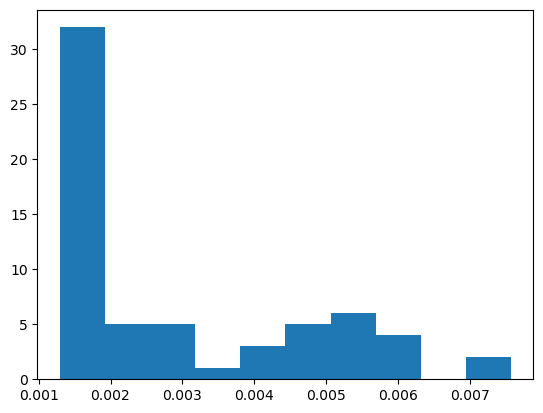

In [33]:
print_loss_analysis(loss_df["mean"].to_numpy().squeeze())
print_loss_analysis(loss_df["avg_accepted"].to_numpy().squeeze())
print_loss_analysis(loss_df["min_accepted"].to_numpy().squeeze())
print_loss_analysis(loss_df["max_accepted"].to_numpy().squeeze())
print_loss_analysis(loss_df["mmd"].to_numpy().squeeze())

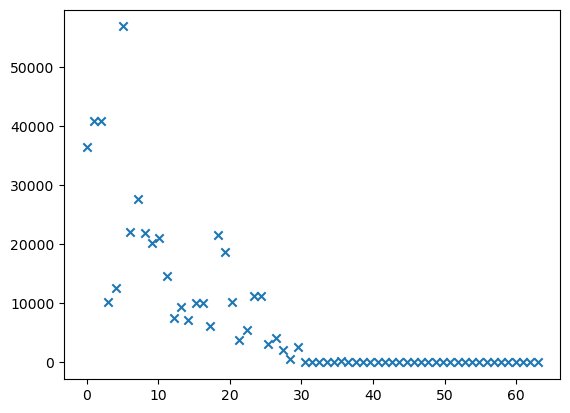

mean: 7469.7047781379915
std: 12031.170420505889
max: 56852.888969193446
min: 0.0018940141890198
range: 56852.88707517926


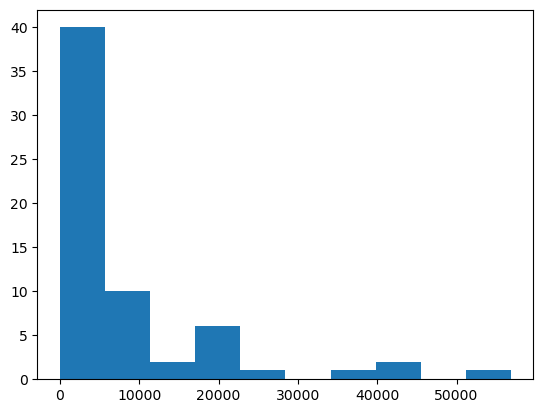

In [34]:
x_vals = np.linspace(0, len(loss_df["diff"]), len(loss_df["diff"]))
plt.scatter(x_vals, loss_df["diff"], marker="x")
plt.show()

print_loss_analysis(loss_df["diff"].to_numpy().squeeze())